Created by Daniel Silalahi (Student Number:21073058)

Download the Data


In [ ]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob

import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

Import data from GITHUB

In [ ]:
'''
Data is gathered from:
Biden:
https://www.whitehouse.gov/briefing-room/speeches-remarks/2022/07/08/remarks-by-president-biden-on-protecting-access-to-reproductive-health-care-services/
https://www.whitehouse.gov/briefing-room/statements-releases/2022/08/02/statement-by-president-joe-biden-on-defeat-of-kansas-ballot-measure-threatening-womens-right-to-abortion/
https://www.rev.com/blog/transcripts/president-biden-delivers-remarks-on-the-supreme-court-decision-6-24-22-transcript

Trump:
https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-47th-annual-march-life/
https://trumpwhitehouse.archives.gov/briefings-statements/remarks-president-trump-march-life-participants-pro-life-leaders/
https://trumpwhitehouse.archives.gov/presidential-actions/presidential-proclamation-national-sanctity-human-life-day-2019/

Obama:
https://obamawhitehouse.archives.gov/the-press-office/2015/01/22/statement-president-42nd-anniversary-roe-v-wade
https://obamawhitehouse.archives.gov/the-press-office/2012/01/22/statement-president-roe-v-wade-anniversary
https://obamawhitehouse.archives.gov/the-press-office/statement-president-obama-36th-anniversary-roe-v-wade
https://obamawhitehouse.archives.gov/the-press-office/remarks-president-notre-dame-commencement

Bush:
https://www.americanrhetoric.com/speeches/gwbushmarchforlife.htm
https://georgewbush-whitehouse.archives.gov/news/releases/2008/01/20080122.html
https://georgewbush-whitehouse.archives.gov/news/releases/2004/01/20040122-3.html

Clinton:
https://clintonwhitehouse6.archives.gov/
https://www.presidency.ucsb.edu/documents/remarks-signing-memorandums-medical-research-and-reproductive-health-and-exchange-with

HW Bush:
https://www.govinfo.gov/content/pkg/PPP-1991-book1/html/PPP-1991-book1-doc-pg55-2.htm
https://www.presidency.ucsb.edu/documents/remarks-participants-the-march-for-life-rally-1

Reagan:
https://www.reaganlibrary.gov/archives/speech/remarks-participants-march-life-rally-0

https://www.reaganlibrary.gov/archives/speech/remarks-white-house-briefing-right-life-activists

Jimmy Carter:
https://www.presidency.ucsb.edu/documents/presidential-campaign-debate-0


Gerald Ford:
https://www.presidency.ucsb.edu/documents/presidential-campaign-debate-0
'''
import pandas as pd

url = "https://raw.githubusercontent.com/Allen-Bian/QM2-Final-project/main/Presidents%20Speeches%20-%20Sheet1.csv"

df = pd.read_csv(url)

Print the data to check

In [ ]:
print(df)

        Presidents                                           Speeches
0        Joe Biden  Good morning, everyone.  Before I speak to the...
1     Donald Trump  Well, thank you very much and thank you, Jeann...
2     Barack Obama  Well, first of all, congratulations, Class of ...
3      George Bush  Well, thank you very much, Nellie. I appreciat...
4     Bill Clinton  Please sit down, ladies and gentlemen. Today I...
5  George H.W Bush  Once again, it is my distinct honor to address...
6    Ronald Reagan  Senators, Congressmen, ladies and gentlemen, w...
7     Jimmy Carter  I would not work hard to support any of those....
8      Gerald Ford  I support the Republican platform which calls ...


Find how many times abortion is mentioned by each president

In [ ]:
import re
df['abortion']=df['Speeches'].apply(lambda x: len(re.findall(r'abortion', x, re.IGNORECASE)))

print(df[['Presidents','abortion']])

        Presidents  abortion
0        Joe Biden         8
1     Donald Trump        15
2     Barack Obama        10
3      George Bush        10
4     Bill Clinton         6
5  George H.W Bush         6
6    Ronald Reagan        40
7     Jimmy Carter         6
8      Gerald Ford         1


Create a dataframe for each president, with rows being their sentences containing abortion


In [ ]:
# create dataframes for each president
df_joe_biden = pd.DataFrame(columns = ['Joe Biden'])
df_donald_trump = pd.DataFrame(columns = ['Donald Trump'])
df_barack_obama = pd.DataFrame(columns = ['Barack Obama'])
df_george_bush = pd.DataFrame(columns = ['George Bush'])
df_bill_clinton = pd.DataFrame(columns = ['Bill Clinton'])
df_george_hw_bush = pd.DataFrame(columns = ['George H.W Bush'])
df_ronald_reagan = pd.DataFrame(columns = ['Ronald Reagan'])
df_jimmy_carter = pd.DataFrame(columns = ['Jimmy Carter'])
df_gerald_ford = pd.DataFrame(columns = ['Gerald Ford'])

dfs = [df_joe_biden, df_donald_trump, df_barack_obama,
       df_george_bush, df_bill_clinton, df_george_hw_bush,
       df_ronald_reagan, df_jimmy_carter, df_gerald_ford]

for i in range(len(dfs)):
    speeches = df.iloc[i,1]
    abortion_sentences = re.findall(r"([^.]*abortion[^.]*)", speeches)
    # assigns abortion_sentences to column of current dataframe in dfs
    # The list(dfs[i])[0] part of the code accesses the first element of
    # the list (which is the name of the column)
    dfs[i][list(dfs[i])[0]] = abortion_sentences

# print all of the dataframes
for df_ in dfs:
  print(df_.head() , '\n')

                                           Joe Biden
0   The majority rattles off laws from the 19th c...
1    Even 150 years ago, the common law and many ...
2    And the Dobbs majority ignores that many law...
3   This vote makes clear what we know: the major...
4   And, the American people must continue to use... 

                                        Donald Trump
0    When it comes to abortion, Democrats is a — ...
1  ” THE PRESIDENT:  Nearly every top Democrat in...
2   Senate Democrats even blocked legislation tha...
3    That’s why I’ve called on Congress — two of ...
4   Wade has resulted in some of the most permiss... 

                                        Barack Obama
0  ) The question, then -- the question then is h...
1    He wrote, "I do not ask at this point that y...
2   That’s when we begin to say, "Maybe we won’t ...
3  " So let us work together to reduce the number...
4  )  Let’s honor the conscience of those who dis... 

                                        

Conduct Sentiment Analysis on Each President Dataframe

In [ ]:
def analysis(score):
  if score>0:
        return 'Positive'
  elif score ==0:
        return 'Neutral'
  else:
        return 'Negative'

for i in range(len(dfs)):
  dfs[i]['Polarity'] = dfs[i][list(dfs[i])[0]].apply(lambda x: nlp(x)._.blob.polarity)
  dfs[i]['Subjectivity'] = dfs[i][list(dfs[i])[0]].apply(lambda x: nlp(x)._.blob.subjectivity)
  dfs[i]['Analysis'] = dfs[i]['Polarity'].apply(analysis)

# show a sample of the data
print(dfs[0].head())

df_list_subjective = []
for i in range(len(dfs)):
  df_list_subjective.append(dfs[i][dfs[i]['Subjectivity'] >= 0.5])
  print(df_list_subjective[i].head())


                                           Joe Biden  Polarity  Subjectivity  \
0   The majority rattles off laws from the 19th c...  0.000000      0.000000   
1    Even 150 years ago, the common law and many ...  0.075000      0.455000   
2    And the Dobbs majority ignores that many law...  0.500000      0.500000   
3   This vote makes clear what we know: the major...  0.328571      0.639683   
4   And, the American people must continue to use...  0.142857      0.267857   

   Analysis  
0   Neutral  
1  Positive  
2  Positive  
3  Positive  
4  Positive  
                                           Joe Biden  Polarity  Subjectivity  \
2    And the Dobbs majority ignores that many law...  0.500000      0.500000   
3   This vote makes clear what we know: the major...  0.328571      0.639683   
5   State laws banning abortion are automatically... -0.183333      0.733333   

   Analysis  
2  Positive  
3  Positive  
5  Negative  
                                        Donald Trump  Pola

Create a Pie Chart of Polarity for Each President

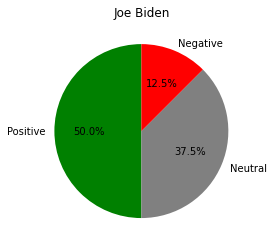

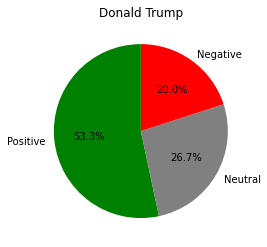

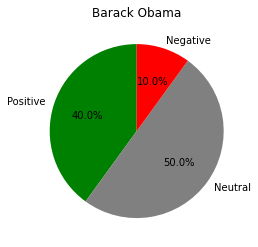

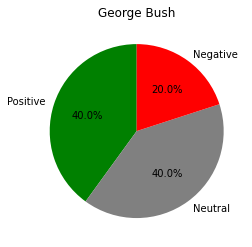

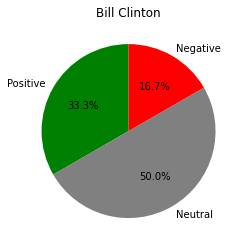

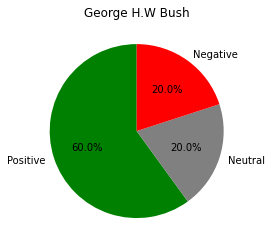

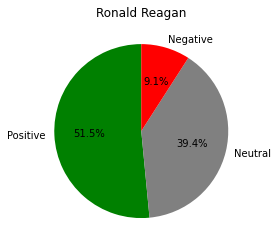

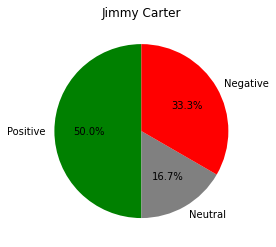

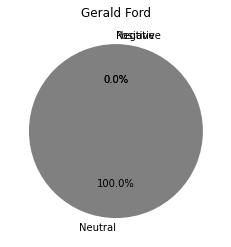

In [ ]:
for i in range(len(dfs)):
  pie_chart_values = dfs[i]['Analysis'].value_counts()
  # put first value of slice as positive, second as negative etc. the '.get' function gets value of the key, but if its not there, returns 0
  # this is done to prevent any key errors if there are any missing values for any Positive, Neutral, or Negative
  # https://www.w3schools.com/python/ref_dictionary_get.asp
  slices = [pie_chart_values.get('Positive', 0), pie_chart_values.get('Neutral', 0), pie_chart_values.get('Negative', 0)]
  labels = ['Positive', 'Neutral', 'Negative']
  colors = ['green', 'grey', 'red']
  plt.pie(slices, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
  #pie_chart_values.plot(kind = 'pie', label='', autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'grey'])
  plt.title(list(dfs[i])[0])
  plt.show()



Pie chart of presidents sentences with subjectivity >= 0.5


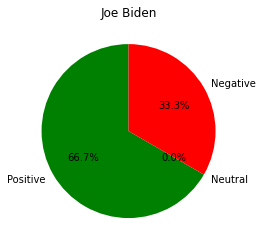

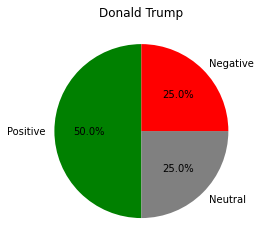

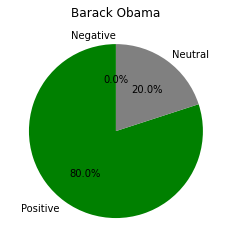

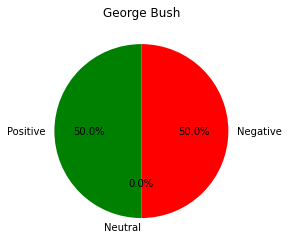

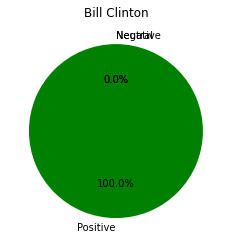

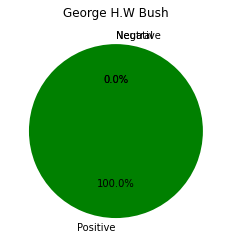

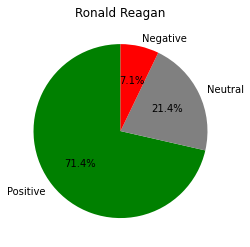

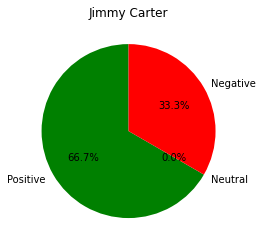

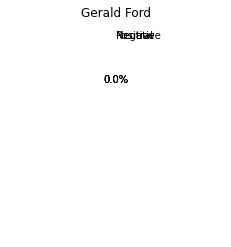

In [ ]:
for i in range(len(df_list_subjective)):
  pie_chart_values = df_list_subjective[i]['Analysis'].value_counts()
  slices = [pie_chart_values.get('Positive', 0), pie_chart_values.get('Neutral', 0), pie_chart_values.get('Negative', 0)]
  labels = ['Positive', 'Neutral', 'Negative']
  colors = ['green', 'grey', 'red']
  plt.pie(slices, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
  #pie_chart_values.plot(kind = 'pie', label='', autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'grey'])
  plt.title(list(df_list_subjective[i])[0])
  plt.show()


Plot Polarity and Subjectivity of each President, using different colour to differentiate them

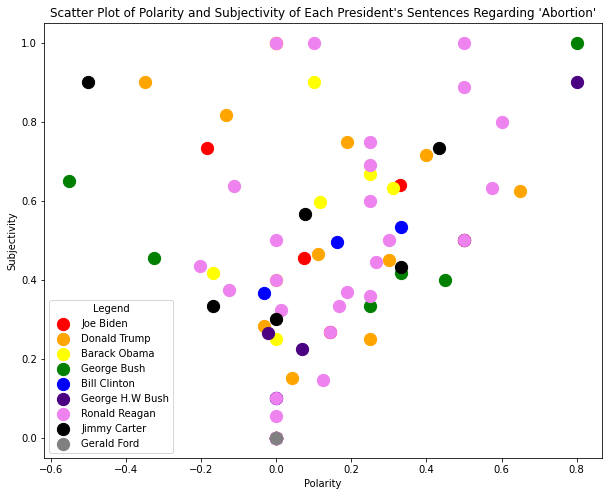

In [ ]:
# list of colours that are easily distuingishable
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black', 'gray']

plt.figure(figsize=(10,8))

# iterate over all dataframes
for i in range(len(dfs)):
  plt.scatter(dfs[i]['Polarity'], dfs[i]['Subjectivity'], color = colors[i], s=150, label = list(dfs[i])[0])


# create legend for each president and their respective colour
plt.legend(title="Legend")

# create plot title
plt.title("Scatter Plot of Polarity and Subjectivity of Each President's Sentences Regarding 'Abortion'")

# label plots
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# show plot
plt.show()

Highets and lowest polarity of each president (with subjectivity>=0.5)

In [ ]:
for i in range(len(df_list_subjective)):
  df_ = df_list_subjective[i]
  if df_.empty:
    lowest = 'None'
    highest = 'None'
  else:
    # This line finds the row in the dataframe with the minimum value in the 'Polarity' column,
    # and returns the value in the first column of that row.
    lowest = df_.loc[df_['Polarity'].idxmin(), list(df_)[0]]
    # This line finds the row in the dataframe with the maximum value in the 'Polarity' column,
    # and returns the value in the first column of that row.
    highest = df_.loc[df_['Polarity'].idxmax(), list(df_)[0]]
  low_num = df_list_subjective[i]['Polarity'].min()
  high_num = df_list_subjective[i]['Polarity'].max()
  print(list(dfs[i])[0], 'Lowest Polarity (', low_num,'): ', lowest)
  print(list(dfs[i])[0], 'Highest Polarity (',high_num,'): ', highest)


  print('')

Joe Biden Lowest Polarity ( -0.18333333333333335 ):   State laws banning abortion are automatically taking effect today, jeopardizing the health of millions of women, some without exceptions, so extreme that women can be punished for protecting their health, so extreme that women and girls were forced to bear their rapist’s child, or the child of consequence
Joe Biden Highest Polarity ( 0.5 ):    And the Dobbs majority ignores that many laws were enacted to protect women at the time when they were dying from unsafe abortions

Donald Trump Lowest Polarity ( -0.35 ):    We are also working to end the abhorrent practice of elective late-term abortion, a practice allowed in only seven countries around the world
Donald Trump Highest Polarity ( 0.65 ):    That’s why I’ve called on Congress — two of our great senators here, so many of our congressmen here — and called upon them to defend the dignity of life and to pass legislation prohibiting  late-term abortion of children who can feel pain 